In [13]:
from functions import evaluation
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [2]:
table = "crypto_ind_one"
startDate = datetime(year=2024, month=2, day=25, hour=0, minute=0, second=0)
analysis = evaluation(table=table, startDate = startDate)

analysis is done at 2024-03-13 22:21:34.922001
querying
processing
requesting to the model server
completed


In [3]:
analysis.df

,time,currency,close,close_minmax_scale,ma7_25h_scale,ma25_99h_scale,ma7_25d_scale
0,2024-02-25 00:00:00,BTCUSDT,51572.71,0.872201,0.007650,-0.003974,0.069514
1,2024-02-25 00:01:00,BTCUSDT,51568.21,0.871794,0.007638,-0.003901,0.069491
2,2024-02-25 00:02:00,BTCUSDT,51581.10,0.872960,0.007694,-0.003884,0.069596
3,2024-02-25 00:03:00,BTCUSDT,51581.10,0.872960,0.007634,-0.003904,0.069604
4,2024-02-25 00:04:00,BTCUSDT,51576.64,0.872557,0.007791,-0.003887,0.069612
...,...,...,...,...,...,...,...
25195,2024-03-13 11:55:00,BTCUSDT,73111.71,0.976659,0.013513,0.019802,0.126261
25196,2024-03-13 11:56:00,BTCUSDT,73108.00,0.976498,0.013607,0.019908,0.126212
25197,2024-03-13 11:57:00,BTCUSDT,73108.00,0.976498,0.013548,0.019889,0.126495
25198,2024-03-13 11:58:00,BTCUSDT,73124.10,0.977196,0.013608,0.019818,0.126311


In [4]:
print(len(analysis.actual))
print(len(analysis.pred))

23760
23760


In [5]:
analysis.actual

[0.00312781701795383,
 0.003234356980783333,
 0.00298365098844347,
 0.002599013979926852,
 0.0022911535144592254,
 0.0026669557339257174,
 0.002710334546739445,
 0.002919804022241928,
 0.002919804022241928,
 0.002919804022241928,
 0.002694493406725278,
 0.0025063210977989132,
 0.002430890646202888,
 0.0024592177301158424,
 0.002205460600919056,
 0.0022119411442787207,
 0.0026329006425930674,
 0.0037265132518413324,
 0.004952430803234297,
 0.005166778057863031,
 0.00461777979198049,
 0.005282276185419474,
 0.0052455768969334165,
 0.004194907847973432,
 0.004103154942298993,
 0.004463518813455138,
 0.00411590519444769,
 0.0035204885056243232,
 0.003762654042567351,
 0.004005147839216174,
 0.0040796202685025994,
 0.0036893096045162235,
 0.0036772737414459767,
 0.0047732511510758385,
 0.005869160106032306,
 0.005701108964477609,
 0.006173036159407204,
 0.0059785868801710065,
 0.0059529661466459155,
 0.005523771257193297,
 0.005648855762786942,
 0.00578639179361818,
 0.005568365928519674,
 

In [6]:
analysis.input

array([[ 0.87220113,  0.00764954, -0.00397386,  0.06951403],
       [ 0.87179392,  0.00763783, -0.00390051,  0.06949065],
       [ 0.87296034,  0.00769439, -0.0038838 ,  0.06959645],
       ...,
       [ 0.96625595, -0.00157958,  0.0347344 ,  0.12860607],
       [ 0.9664382 , -0.00142068,  0.03460477,  0.12844007],
       [ 0.9664382 , -0.00118216,  0.03455775,  0.12841318]])

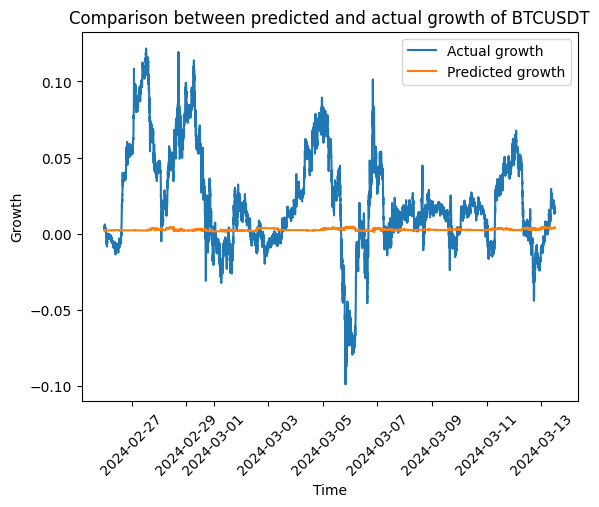

In [7]:
analysis.plot()

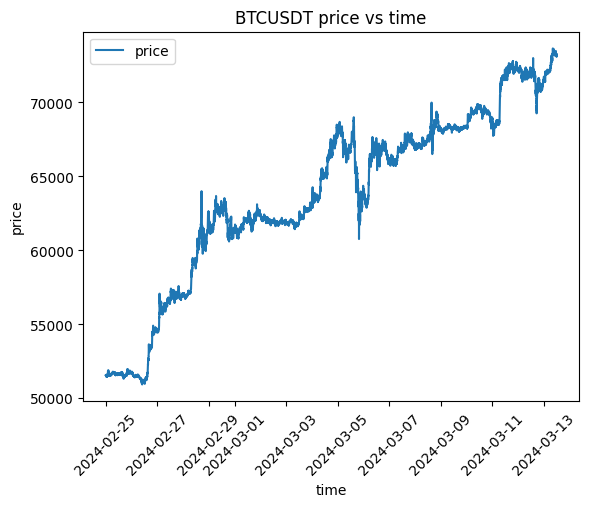

In [8]:
analysis.plot_price()

In [9]:
df = analysis.df
close = list(df["close"])
for i in range(len(df) - 1440):
    print(f"change by {(close[i+1440]-close[i])} from {close[i]} = {(close[i+1440]-close[i])/close[i]}")

change by 161.30999999999767 from 51572.71 = 0.00312781701795383
change by 166.79000000000087 from 51568.21 = 0.003234356980783333
change by 153.90000000000146 from 51581.1 = 0.00298365098844347
change by 134.06000000000495 from 51581.1 = 0.002599013979926852
change by 118.16999999999825 from 51576.64 = 0.0022911535144592254
change by 137.52999999999884 from 51568.16 = 0.0026669557339257174
change by 139.76000000000204 from 51565.59 = 0.002710334546739445
change by 150.52999999999884 from 51554.83 = 0.002919804022241928
change by 150.52999999999884 from 51554.83 = 0.002919804022241928
change by 150.52999999999884 from 51554.83 = 0.002919804022241928
change by 138.90999999999622 from 51553.29 = 0.002694493406725278
change by 129.1800000000003 from 51541.68 = 0.0025063210977989132
change by 125.29000000000087 from 51540.78 = 0.002430890646202888
change by 126.75 from 51540.78 = 0.0024592177301158424
change by 113.65999999999622 from 51535.72 = 0.002205460600919056
change by 113.979999999

In [10]:
pred = analysis.pred
for e in pred:
    print(e)

0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0022150634322315454
0.0022150634322315454
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0022150634322315454
0.0022150634322315454
0.0022150634322315454
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0023726143408566713
0.0022150634322315454
0.0022150634322315454
0.00221506

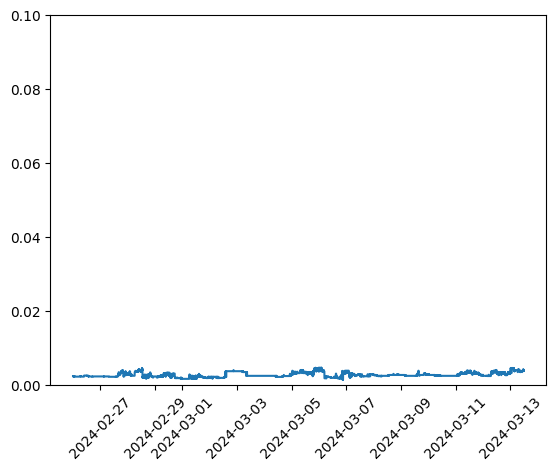

In [11]:
df = analysis.df
x = list(df["time"][1440:])
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.plot(x, pred)

In [12]:
report = analysis.classification_report()
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6526
           1       0.73      1.00      0.84     17234

    accuracy                           0.73     23760
   macro avg       0.36      0.50      0.42     23760
weighted avg       0.53      0.73      0.61     23760



C:\Users\User\Code\Senior\evaluation\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\Code\Senior\evaluation\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\Code\Senior\evaluation\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [14]:
mse = mean_squared_error(analysis.actual, analysis.pred)
mse

0.001451558395148115